### Pandas Dataframes

`pandas` is a "library providing high-performance, easy-to-use data structures and data analysis tools".  In lesson 21 I introduced the main tool that we will be using from pandas to organize our data: **the pandas dataframe**. Working with dataframes shares similarities with dictionaries (so if you are familiar with those, it likely will be easy for you).

A pandas `DataFrame` houses columns of data where each column is represented as a `Series`. A Series is similar to an array in numpy, in that we do not have to iterate through elements, but can apply functions, transformations, or manipulations easily to entire Series of data, or, sometimes, to the entire dataframe.

### Getting data into a dataframe

The simplest way to get data into a dataframe is if it already exists in table format (such as a .csv file). However, since we mainly will be creating the data ourselves from scratch, it will be useful to see how data can be passed from other formats into a single dataframe.

Recall we created a key profile dictionary in our 'Key Finding' lesson...

In [1]:
import numpy as np
#profile values by pitch class
#CMajor:
major_0 = np.array([6.35,2.23,3.48,2.33,4.38,4.09,2.52,5.19,2.39,3.66,2.29,2.88]) #values: C,C#,D,D#,...B
#CMinor:
minor_0 = np.array([6.33,2.68,3.52,5.38,2.60,3.53,2.54,4.75,3.98,2.69,3.34,3.17]) #values: C,C#,D,D#,...B

#create array of key profiles for all 24 keys
arraysDict = {}
for i in range(0,12):
    arraysDict['major_{0}'.format(i)] = np.roll(major_0,i)#iteratively create each label while rotating
    arraysDict['minor_{0}'.format(i)] = np.roll(minor_0,i)#np.roll is a handy shifting/rotating function


We can take a dictionary that has the correct shape, and simply pass it to a dataframe. By default each (key, value) pair in the dictionary will map as: (column-label, column-data)

In [2]:
import pandas as pd #import pandas library
key_pfs = pd.DataFrame(arraysDict) #pass key profiles dictionary to the "DataFrame" function and save

In [3]:
key_pfs

,major_0,minor_0,major_1,minor_1,major_2,minor_2,major_3,minor_3,major_4,minor_4,...,major_7,minor_7,major_8,minor_8,major_9,minor_9,major_10,minor_10,major_11,minor_11
0,6.35,6.33,2.88,3.17,2.29,3.34,3.66,2.69,2.39,3.98,...,4.09,3.53,4.38,2.60,2.33,5.38,3.48,3.52,2.23,2.68
1,2.23,2.68,6.35,6.33,2.88,3.17,2.29,3.34,3.66,2.69,...,2.52,2.54,4.09,3.53,4.38,2.60,2.33,5.38,3.48,3.52
2,3.48,3.52,2.23,2.68,6.35,6.33,2.88,3.17,2.29,3.34,...,5.19,4.75,2.52,2.54,4.09,3.53,4.38,2.60,2.33,5.38
3,2.33,5.38,3.48,3.52,2.23,2.68,6.35,6.33,2.88,3.17,...,2.39,3.98,5.19,4.75,2.52,2.54,4.09,3.53,4.38,2.60
4,4.38,2.60,2.33,5.38,3.48,3.52,2.23,2.68,6.35,6.33,...,3.66,2.69,2.39,3.98,5.19,4.75,2.52,2.54,4.09,3.53
5,4.09,3.53,4.38,2.60,2.33,5.38,3.48,3.52,2.23,2.68,...,2.29,3.34,3.66,2.69,2.39,3.98,5.19,4.75,2.52,2.54
6,2.52,2.54,4.09,3.53,4.38,2.60,2.33,5.38,3.48,3.52,...,2.88,3.17,2.29,3.34,3.66,2.69,2.39,3.98,5.19,4.75
7,5.19,4.75,2.52,2.54,4.09,3.53,4.38,2.60,2.33,5.38,...,6.35,6.33,2.88,3.17,2.29,3.34,3.66,2.69,2.39,3.98
8,2.39,3.98,5.19,4.75,2.52,2.54,4.09,3.53,4.38,2.60,...,2.23,2.68,6.35,6.33,2.88,3.17,2.29,3.34,3.66,2.69
9,3.66,2.69,2.39,3.98,5.19,4.75,2.52,2.54,4.09,3.53,...,3.48,3.52,2.23,2.68,6.35,6.33,2.88,3.17,2.29,3.34


We can also read in data directly from a multidimensional array. Here, by default, each subarray will map to a row of table data:

In [4]:
fruits = np.array([[5.5,6.5,7.9,5.7,6.8,8.1],[5.1,3.4,6.5,8.8,6.3,4.9],[4.3,6.7,6.5,4.6,7.2,7.9]])
fruitTable = pd.DataFrame(fruits)
fruitTable

,0,1,2,3,4,5
0,5.5,6.5,7.9,5.7,6.8,8.1
1,5.1,3.4,6.5,8.8,6.3,4.9
2,4.3,6.7,6.5,4.6,7.2,7.9


To "flip" the table (which may be necessary depending on the output of data) use the `pandas.transpose` function (or the .T method)

In [5]:
fruitTable = fruitTable.transpose()

In [6]:
fruitTable

,0,1,2
0,5.5,5.1,4.3
1,6.5,3.4,6.7
2,7.9,6.5,6.5
3,5.7,8.8,4.6
4,6.8,6.3,7.2
5,8.1,4.9,7.9


In [7]:
fruitTable.T

,0,1,2,3,4,5
0,5.5,6.5,7.9,5.7,6.8,8.1
1,5.1,3.4,6.5,8.8,6.3,4.9
2,4.3,6.7,6.5,4.6,7.2,7.9


You can manually add column names to your data post-hoc, like this...

In [8]:
fruitTable.columns = ["apples","oranges","bananas"]

In [9]:
fruitTable

,apples,oranges,bananas
0,5.5,5.1,4.3
1,6.5,3.4,6.7
2,7.9,6.5,6.5
3,5.7,8.8,4.6
4,6.8,6.3,7.2
5,8.1,4.9,7.9


...or you can pass row and column labels directly when you are creating the data. (Notice with the dictionary, the dataframe already automatically takes the "key" label as the column label.)

In [10]:
grades = np.array([[5.5,6.5,7.9,5.7,6.8,8.1],[5.1,3.4,6.5,8.8,6.3,4.9],[4.3,6.7,6.5,4.6,7.2,7.9]])
gradeTab = pd.DataFrame(grades, index=['Sally','Harry','Sam'], columns=["quiz1","quiz2","quiz3","quiz4","quiz5","quiz6"])
gradeTab

,quiz1,quiz2,quiz3,quiz4,quiz5,quiz6
Sally,5.5,6.5,7.9,5.7,6.8,8.1
Harry,5.1,3.4,6.5,8.8,6.3,4.9
Sam,4.3,6.7,6.5,4.6,7.2,7.9


Pandas dataframes are very useful because unlike numpy arrays, we can store different types of data in each column (or Series). So we could have one column of data with a text (e.g., key) label, and other columns with chromagram averages. Or one column with True/False data, and another with integer values. 

Once you have an existing DataFrame, it's easy to add additional columns of data, so long as they match the dimensions.

In [11]:
quiz7=np.array([8.8,9.7,9.0])
gradeTab['quiz7'] = quiz7
gradeTab

,quiz1,quiz2,quiz3,quiz4,quiz5,quiz6,quiz7
Sally,5.5,6.5,7.9,5.7,6.8,8.1,8.8
Harry,5.1,3.4,6.5,8.8,6.3,4.9,9.7
Sam,4.3,6.7,6.5,4.6,7.2,7.9,9.0


In [12]:
gradeTab = gradeTab.transpose()
gradeTab

,Sally,Harry,Sam
quiz1,5.5,5.1,4.3
quiz2,6.5,3.4,6.7
quiz3,7.9,6.5,6.5
quiz4,5.7,8.8,4.6
quiz5,6.8,6.3,7.2
quiz6,8.1,4.9,7.9
quiz7,8.8,9.7,9.0


Note that normally we don't use the 'index' (or row) labels, and just leave those as automatically assigned (to a number). This is because otherwise, when adding data, if the data doesn't have the same index values, it will not work when you append to the dataframe:

In [13]:
Julie = pd.Series([7.8,8.7,9.0,8.9,7.9,8.3,9.7])
gradeTab['Julie'] = Julie
gradeTab

,Sally,Harry,Sam,Julie
quiz1,5.5,5.1,4.3,NaN
quiz2,6.5,3.4,6.7,NaN
quiz3,7.9,6.5,6.5,NaN
quiz4,5.7,8.8,4.6,NaN
quiz5,6.8,6.3,7.2,NaN
quiz6,8.1,4.9,7.9,NaN
quiz7,8.8,9.7,9.0,NaN


However...

In [14]:
Julie = pd.Series([7.8,8.7,9.0,8.9,7.9,8.3,9.7], index=["quiz1","quiz2","quiz3","quiz4","quiz5","quiz6","quiz7"])
gradeTab['Julie'] = Julie
gradeTab

,Sally,Harry,Sam,Julie
quiz1,5.5,5.1,4.3,7.8
quiz2,6.5,3.4,6.7,8.7
quiz3,7.9,6.5,6.5,9.0
quiz4,5.7,8.8,4.6,8.9
quiz5,6.8,6.3,7.2,7.9
quiz6,8.1,4.9,7.9,8.3
quiz7,8.8,9.7,9.0,9.7


If we hadn't initially passed any index labels, they would be numbered by default automatically and then the new column would have matched the existing indices. **Moral of the story: avoid using labeled index values.**

### Selecting data in a DataFrame

I strongly recommend that you watch [this short 3m video](https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/extracting-and-transforming-data?ex=1) on indexing data in pandas dataframes. 

### Filtering data in a DataFrame

This is even more important than indexing data: accessing subsets of data based on the properties of the data itself. It is important that you understand how to do this. Please watch [this 4m video](https://campus.datacamp.com/courses/manipulating-dataframes-with-pandas/extracting-and-transforming-data?ex=9) about filtering dataframe data.

### Plotting

Pandas has its own built-in plotting library, built on matplotlib. By default, you can pass any Series or dataframe to plot:

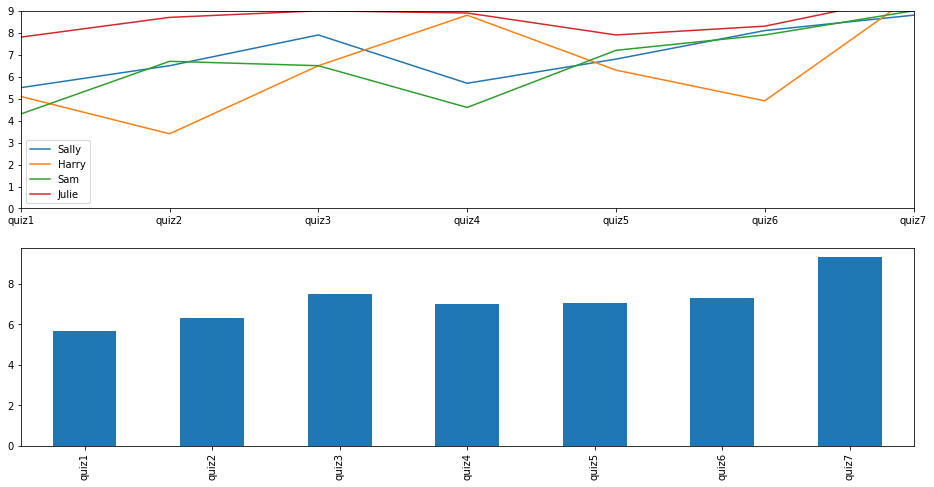

In [15]:
quizavg = gradeTab.mean(axis=1) #axis 0 =columns, axis 1 = rows

import matplotlib.pyplot as plt

fig = plt.figure(figsize = (16,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
gradeTab.plot(ax=ax1, ylim=(0,9))
quizavg.plot.bar()


First graph shows individual student behavior, second graph allows us to see overall trends where students appear to be improving as quizzes go on through the year.

## Which `.plot` do I use?

When you use `.plot` on a dataframe, you *sometimes* pass things to it and *sometimes* you don't.

* `.plot` plots the index against every column
* `.plot(x='col1')` plots against a single specific column
* `.plot(x='col1', y='col2')` plots one specific column against another specific column

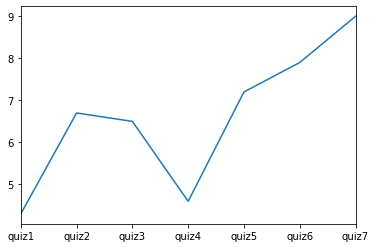

In [16]:
#show Sam's performance
gradeTab['Sam'].plot(x='Sam')

Text(0, 0.5, 'Sally')

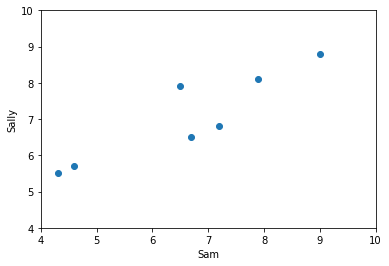

In [17]:
#Plot Sam's performance on each quiz against Sally's
ax = gradeTab[['Sam','Sally']].plot(x='Sam',y='Sally', style='o', legend=False)
ax.set_ylim([4,10])
ax.set_xlim([4,10])
ax.set_xlabel("Sam")
ax.set_ylabel("Sally")

What we will be working towards is creating a DataFrame structure where each row represents a song clip, and each column value represents a global statistic for the clip. Features with multidimensional output (like MFCCs) will therefore require multiple columns (one column per dimension). 

More on this next time :)